# **BASIC ANN**
Using ANN for Hand writing recognition in MNIST dataset

In [0]:
import keras
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index=651

7


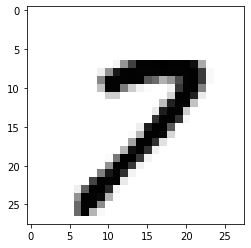

In [0]:
print(y_train[image_index])
plt.imshow(x_train[image_index],cmap='Greys')

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255

y_train = keras.utils.to_categorical(y_train, 10) 
y_test = keras.utils.to_categorical(y_test, 10)
print("x_train shape : ",x_train.shape)
print("number of images in x_test : ",x_test.shape[0])
print("number of images in x_train : ",x_train.shape[0])

x_train shape :  (60000, 784)
number of images in x_test :  10000
number of images in x_train :  60000


In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))


In [0]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [0]:
history=model.fit(x_train,y_train,batch_size=128,epochs=20,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.8269 - accuracy: 0.7468 - val_loss: 0.3687 - val_accuracy: 0.8906
Epoch 2/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.3511 - accuracy: 0.8957 - val_loss: 0.2789 - val_accuracy: 0.9170
Epoch 3/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.2769 - accuracy: 0.9175 - val_loss: 0.2278 - val_accuracy: 0.9311
Epoch 4/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.2258 - accuracy: 0.9324 - val_loss: 0.2082 - val_accuracy: 0.9328
Epoch 5/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.1901 - accuracy: 0.9426 - val_loss: 0.1582 - val_accuracy: 0.9513
Epoch 6/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.1636 - accuracy: 0.9508 - val_loss: 0.1460 - val_accuracy: 0.9553
Epoch 7/20
60000/60000 [==============================] - 8s 1

In [0]:
score=model.evaluate(x_test,y_test)
print("loss = ",score[0])
print("accuracy = ",score[1])

10000/10000 [==============================] - 1s 64us/step
loss =  0.07030032335221767
accuracy =  0.9781000018119812


#TEST ACCURACY =  97.81% 

#LOSS= 7%

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
pred=model.predict(x_test)
print(pred.argmax())

1625


Visualising data with maximum value

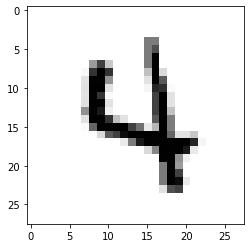

In [0]:
image_index=1625
plt.imshow(x_test[image_index].reshape(28,28),cmap='Greys')